# eWaterCycle STEMMUS_SCOPE model

This notebook is to showcase/test the containerized model.

In [1]:
import ewatercycle.models

/home/bart/miniconda3/envs/lock2/lib/python3.12/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498


To be able to initialize the model, we need a parameterset:

In [2]:
from ewatercycle.base.parameter_set import ParameterSet
from pathlib import Path

arslu_params = ParameterSet(
    name="STEMMUS_SCOPE-AR-Slu",
    directory=Path("/data/AR-SLu_2024-01-25-0911"),
    config=Path("AR-SLu_2024-01-25-0911_config.txt"),
    target_model="stemmusscope",
    supported_model_versions={"1.6.1", },
)

In [3]:
model = ewatercycle.models.sources["StemmusScope"](parameter_set=arslu_params)

In [4]:
cfg_file, _ = model.setup()

In [6]:
model.initialize(cfg_file)

In [7]:
model.bmi.get_component_name()

'STEMMUS_SCOPE'

In [8]:
model.update()

In [9]:
model.output_var_names

('respiration',
 'evaporation_total',
 'soil_temperature',
 'soil_moisture',
 'soil_root_water_uptake',
 'surface_runoff_total',
 'surface_runoff_hortonian',
 'surface_runoff_dunnian',
 'groundwater_root_water_uptake',
 'groundwater_recharge',
 'groundwater_recharge_index')

In [12]:
model.get_value("respiration")

array([3.27374831])

In [15]:
times = []
resp = []

for i in range(24):
    times.append(model.time_as_datetime)
    resp.append(model.get_value("respiration"))
    model.update()

Text(0, 0.5, 'Respiration [cm s-1]')

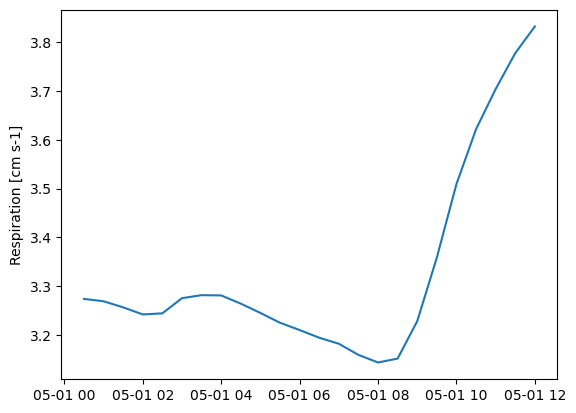

In [17]:
import matplotlib.pyplot as plt
plt.plot(times, resp)
plt.ylabel(f"Respiration [{model.bmi.get_var_units("respiration")}]")

To make sure that the container running the model is nicely shut down and doesn't keep running in the background (taking up resources) we need to 'finalize' it.

In [18]:
model.finalize()